In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
# Reading dataframes
trainDf= pd.read_csv('encodedTrainDf')
testDf= pd.read_csv('encodedTestDf')

### Obtaining X_train and y_train

In [55]:
trainDf.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,1,0,0,0,0,5849,0.0,149.265957,360.0,1.0,2,1
1,1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [56]:
X_train= trainDf.drop(columns= ['Unnamed: 0','Loan_Status','Loan_ID'])
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,149.265957,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [57]:
y_train= trainDf.Loan_Status
y_train.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

### Obtaining X_test and y_test

In [58]:
testDf.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0000,2,1
1,1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0000,2,1
2,2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0000,2,1
3,3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,0.8327,2,1
4,4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0000,2,1


In [59]:
X_test= testDf.drop(columns= ['Unnamed: 0','Loan_Status','Loan_ID'])
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0000,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0000,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0000,2
3,1,1,2,0,0,2340,2546,100.0,360.0,0.8327,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0000,2


In [60]:
y_test= testDf.Loan_Status
y_test.head()

0    1
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

# Applying ML Algorithm

In [61]:
accuracy= {}

### 1. Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [63]:
model.fit(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
model.score(X_test, y_test)

0.9863760217983651

In [65]:
## Applying pipelining technique
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [66]:
print("scaler mean:\n",scaler.mean_)
print("scaler scale:\n",scaler.scale_)

scaler mean:
 [8.17589577e-01 6.48208469e-01 8.30618893e-01 2.18241042e-01
 1.33550489e-01 5.40345928e+03 1.62124580e+03 1.46404145e+02
 3.42008467e+02 8.42564768e-01 1.03745928e+00]
scaler scale:
 [3.86182419e-01 4.77529318e-01 1.21230416e+00 4.13051921e-01
 3.40168716e-01 6.10406486e+03 2.92386446e+03 8.39818129e+01
 6.43248295e+01 3.49458836e-01 7.86840501e-01]


In [67]:
scaler.transform(X_train)

array([[ 0.47234264, -1.3574213 , -0.68515717, ...,  0.27969811,
         0.45051152,  1.22329839],
       [ 0.47234264,  0.73669096,  0.13971833, ...,  0.27969811,
         0.45051152, -1.31851281],
       [ 0.47234264,  0.73669096, -0.68515717, ...,  0.27969811,
         0.45051152,  1.22329839],
       ...,
       [ 0.47234264,  0.73669096,  0.13971833, ...,  0.27969811,
         0.45051152,  1.22329839],
       [ 0.47234264,  0.73669096,  0.96459383, ...,  0.27969811,
         0.45051152,  1.22329839],
       [-2.11710719, -1.3574213 , -0.68515717, ...,  0.27969811,
        -2.41105584, -0.04760721]])

In [68]:
scaler.transform(X_test)

array([[ 0.47234264,  0.73669096, -0.68515717, ...,  0.27969811,
         0.45051152,  1.22329839],
       [ 0.47234264,  0.73669096,  0.13971833, ...,  0.27969811,
         0.45051152,  1.22329839],
       [ 0.47234264,  0.73669096,  0.96459383, ...,  0.27969811,
         0.45051152,  1.22329839],
       ...,
       [ 0.47234264, -1.3574213 , -0.68515717, ...,  0.27969811,
        -0.02822979, -0.04760721],
       [ 0.47234264,  0.73669096, -0.68515717, ...,  0.27969811,
         0.45051152, -1.31851281],
       [ 0.47234264, -1.3574213 , -0.68515717, ..., -2.51859924,
         0.45051152, -1.31851281]])

In [69]:
model.fit(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
model.score(X_test, y_test)

0.9863760217983651

In [71]:
accuracy['LogisticRegression']= 0.9863760217983651

In [72]:
accuracy

{'LogisticRegression': 0.9863760217983651}

In [107]:
y_predict= model.predict(X_test)
np.unique(y_predict, return_counts= True)

(array([0, 1], dtype=int64), array([137, 230], dtype=int64))

### 2. Decision Tree

In [73]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [74]:
model.score(X_test, y_test)

0.7629427792915532

In [75]:
y_predict= model.predict(X_test)

In [108]:
accuracy['DecisionTree']= 0.7629427792915532
accuracy

{'LogisticRegression': 0.9863760217983651, 'DecisionTree': 0.7629427792915532}

### 3. Support Vector Machine

In [109]:
from sklearn.svm import SVC
model = SVC()

In [110]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8419618528610354

In [119]:
accuracy['SVM']= 0.8419618528610354
accuracy

{'LogisticRegression': 0.9863760217983651,
 'DecisionTree': 0.7629427792915532,
 'SVM': 0.8419618528610354}

In [125]:
ans= ('%2.5f'%(0.8419618528610354))
ans

'0.84196'

### 4. K- Nearest Neighbors

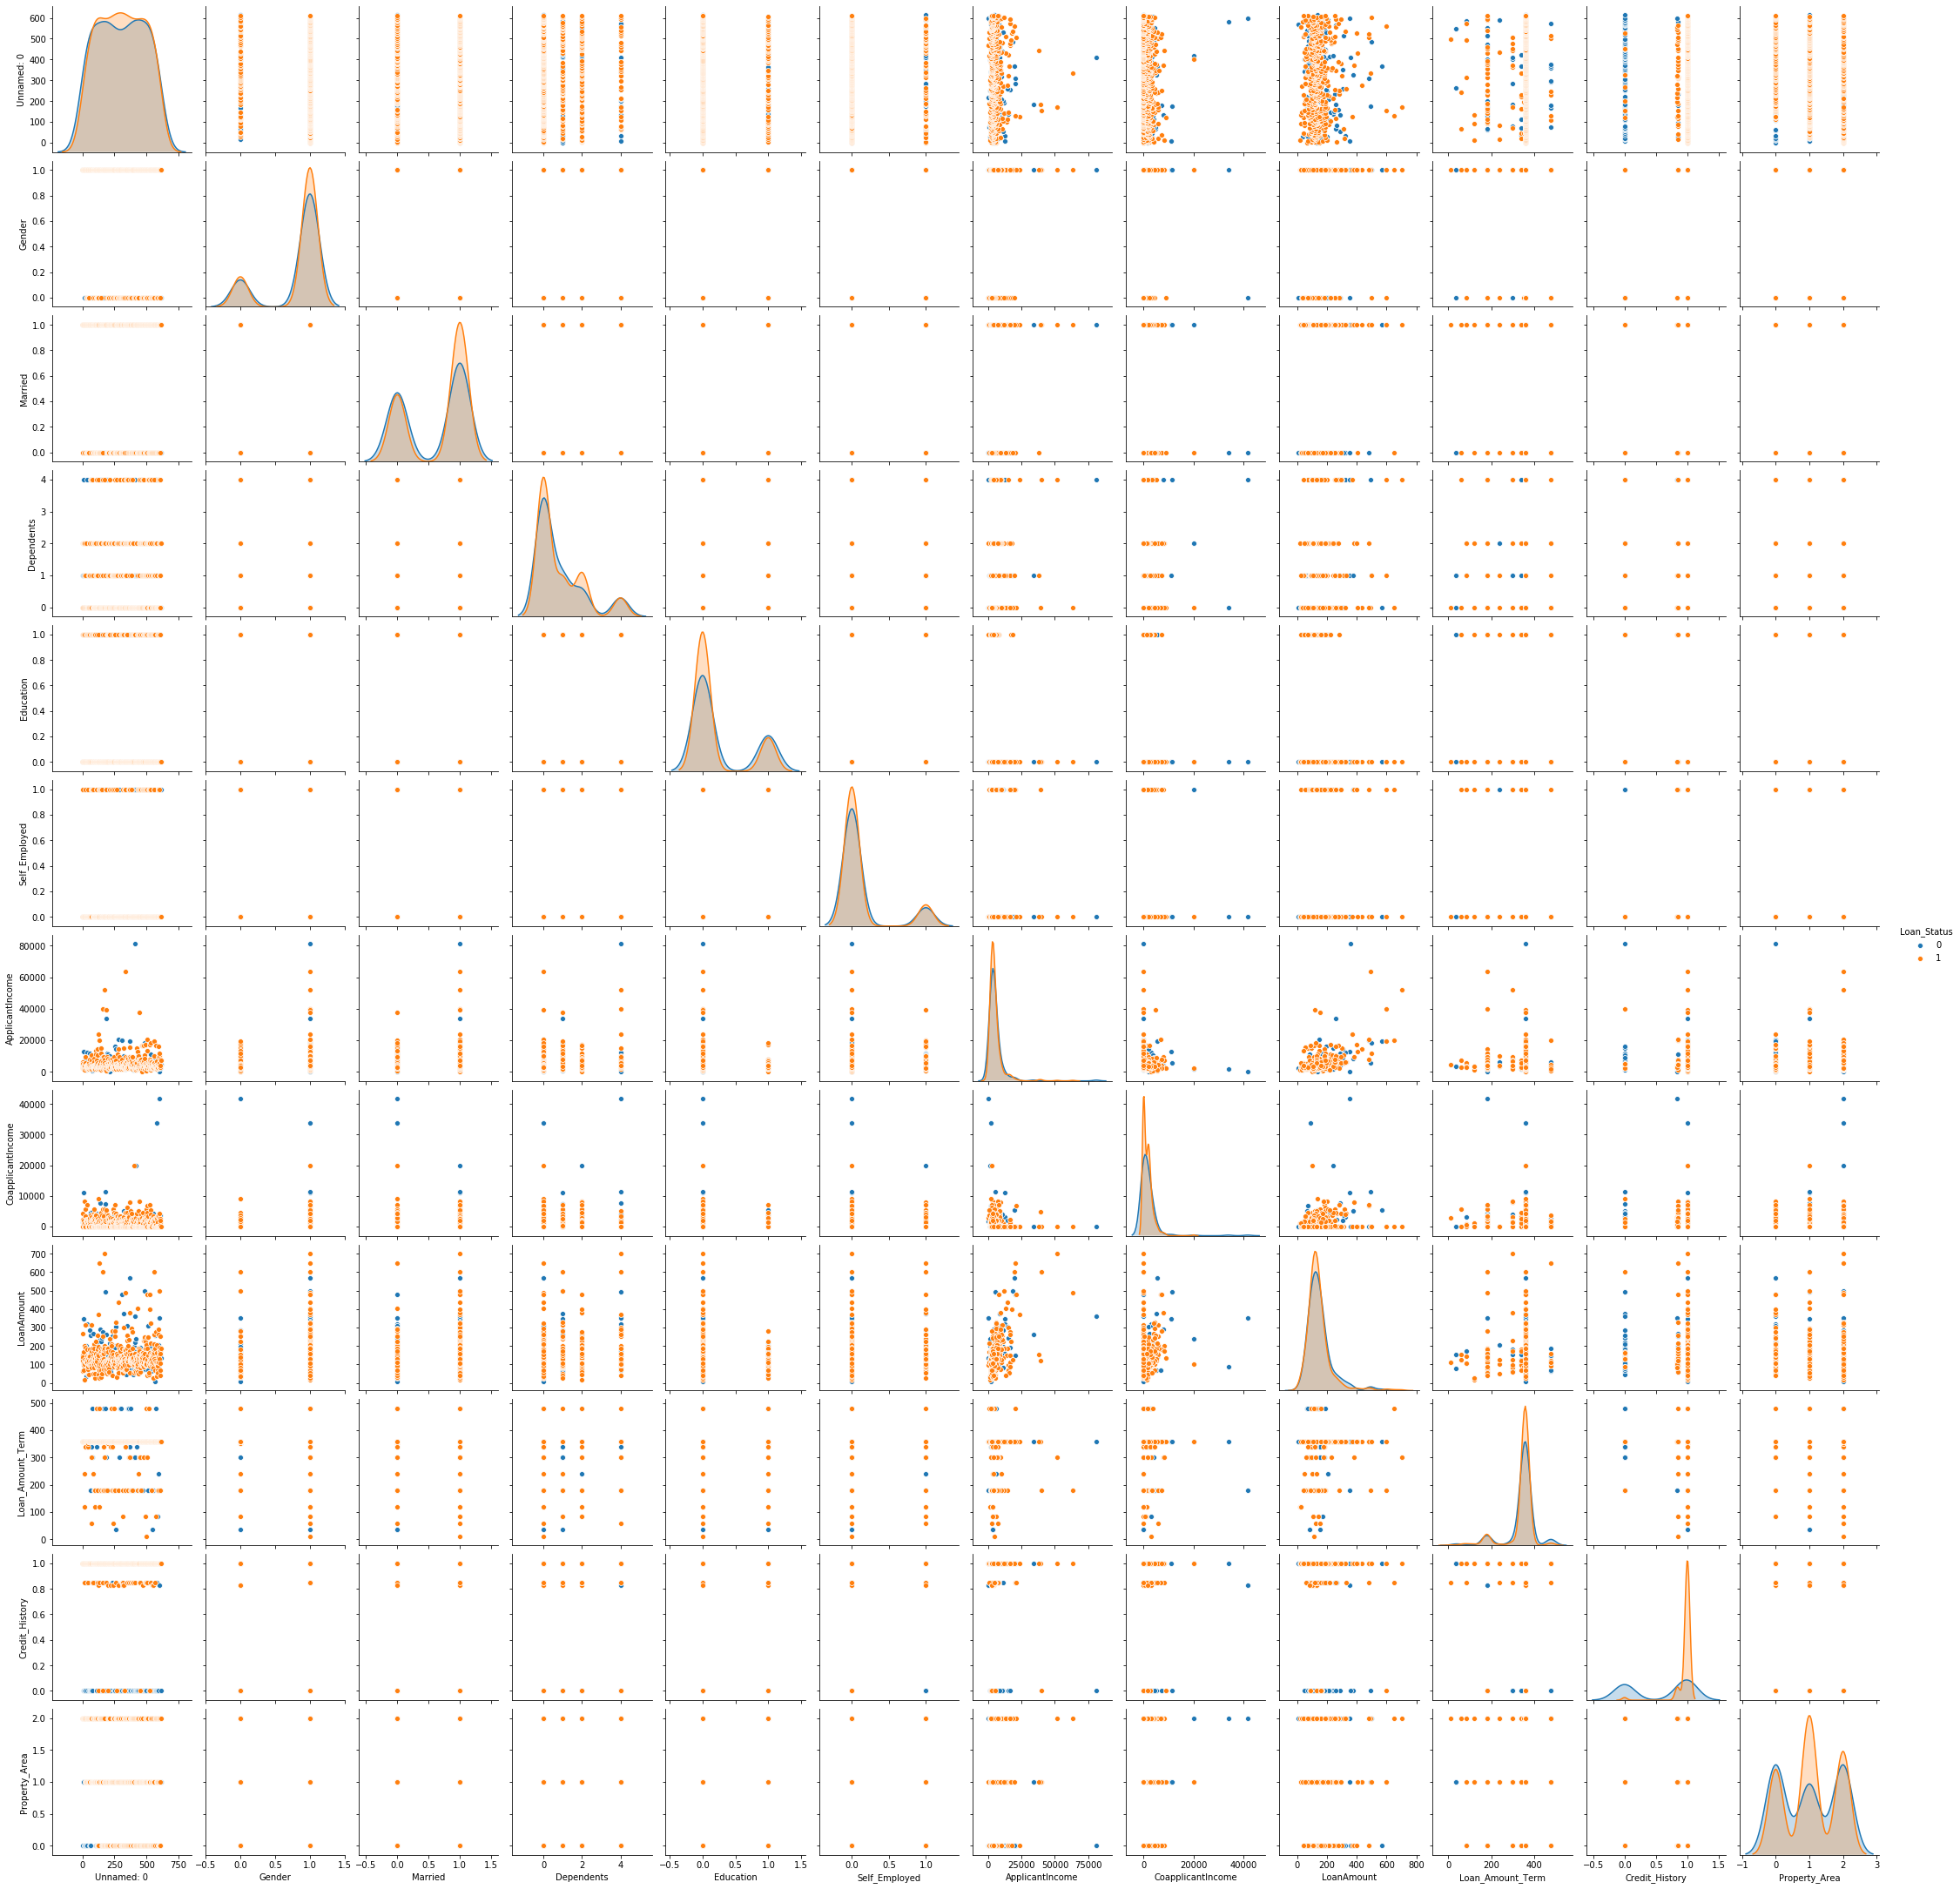

In [128]:
sns.pairplot(trainDf ,hue='Loan_Status')

In [129]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [130]:
pred = knn.predict(X_test)

In [132]:
#Predictions and Evaluations
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 22  36]
 [ 91 218]]
              precision    recall  f1-score   support

           0       0.19      0.38      0.26        58
           1       0.86      0.71      0.77       309

    accuracy                           0.65       367
   macro avg       0.53      0.54      0.52       367
weighted avg       0.75      0.65      0.69       367



In [173]:
## Choosing a K value
from sklearn.model_selection import cross_val_score

accuracy_rate = []
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    #accuracy
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())
    
    #error
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

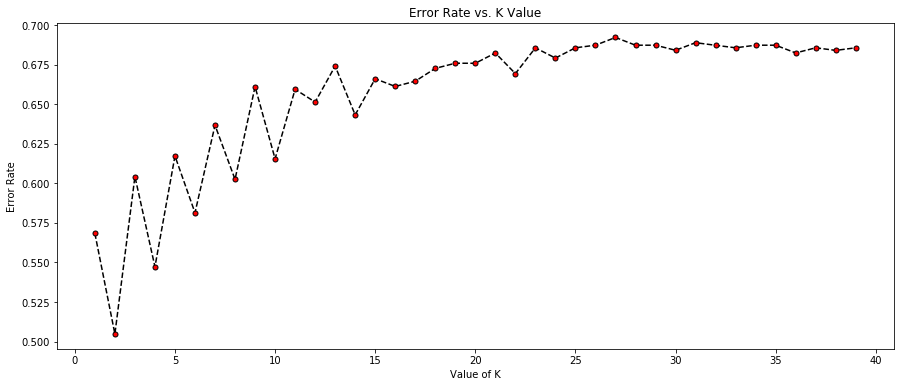

In [174]:
# Graph to choose an appropriate value of value 
plt.figure(figsize=(15,6))
plt.plot([i for i in range(1,40)], accuracy_rate, color='black', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('Value of K')
plt.ylabel('Error Rate')

In [175]:
# Case-1: Using k=15
knn = KNeighborsClassifier(n_neighbors= 15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('With K=15')
print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

With K=15
[[  7  51]
 [ 17 292]]

              precision    recall  f1-score   support

           0       0.29      0.12      0.17        58
           1       0.85      0.94      0.90       309

    accuracy                           0.81       367
   macro avg       0.57      0.53      0.53       367
weighted avg       0.76      0.81      0.78       367



In [180]:
knn.score(X_test, y_test)

0.8147138964577657

In [181]:
accuracy['KNN']= 0.8147138964577657

In [182]:
accuracy

{'LogisticRegression': 0.9863760217983651,
 'DecisionTree': 0.7629427792915532,
 'SVM': 0.8419618528610354,
 'KNN': 0.8147138964577657}

In [208]:
# Plotting graph of accuracies of different models
x= accuracy.keys()
y= accuracy.values()
color= ['green','red', 'blue','orange',]

<BarContainer object of 4 artists>

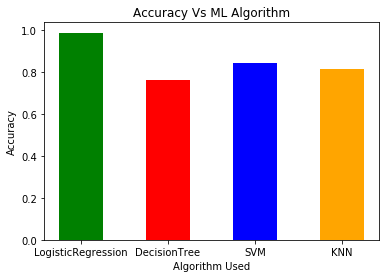

In [214]:
plt.title('Accuracy Vs ML Algorithm')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm Used')
plt.bar(x,y, color= color, width=0.5)